<a href="https://colab.research.google.com/github/monali0802/CE888/blob/main/Lab_3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
# from sklearn.metrics import fbeta_score, Scorer
from sklearn.metrics import balanced_accuracy_score 
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/ce888/master/lab3/bank-additional-full.csv", delimiter=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
print(df.columns)
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']


print(df[features].head())

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
   age        job  marital  ... cons.conf.idx euribor3m nr.employed
0   56  housemaid  married  ...         -36.4     4.857      5191.0
1   57   services  married  ...         -36.4     4.857      5191.0
2   37   services  married  ...         -36.4     4.857      5191.0
3   40     admin.  married  ...         -36.4     4.857      5191.0
4   56   services  married  ...         -36.4     4.857      5191.0

[5 rows x 20 columns]


In [4]:
print("Number of rows before dropping NaNs: %d" % len(df))
df = df.dropna()
print("Number of rows after dropping NaNs: %d" % len(df))

Number of rows before dropping NaNs: 41188
Number of rows after dropping NaNs: 41188


In [5]:
outcomes=  ['y']

df[outcomes].head()

,y
0,no
1,no
2,no
3,no
4,no


In [6]:
df[["y"]] = df[["y"]].apply(LabelEncoder().fit_transform)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [7]:
outcomes_of_interest = ["y"]

X_df = df[features].copy()
y_df = df[outcomes_of_interest].copy()

cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']
#print(X_df.head())
#print(set(X_df["Category"]))
#print(pd.get_dummies(X_df, columns=["Category"]).head())

X_df = pd.get_dummies(X_df, columns=cat_features)
X_df = X_df.drop(columns=['duration'])
print(X_df.head())

   age  campaign  ...  poutcome_nonexistent  poutcome_success
0   56         1  ...                     1                 0
1   57         1  ...                     1                 0
2   37         1  ...                     1                 0
3   40         1  ...                     1                 0
4   56         1  ...                     1                 0

[5 rows x 62 columns]


In [8]:
X = X_df.values
y = y_df.values

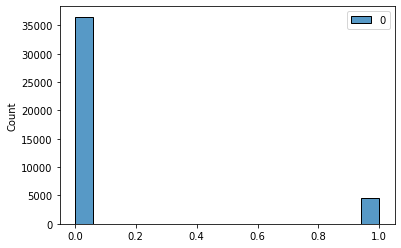

In [9]:
sns_plot = sns.histplot(y, kde=False)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)
y_train = y_train.ravel()#reshape((-1,))


In [11]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=50)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [12]:
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train, y_train)

dummy_scores = cross_val_score(dummy_clf, X_train, y_train, cv=10, scoring = make_scorer(f1_score))

In [13]:
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring = make_scorer(f1_score))

In [14]:
# print("Dummy ACC: %.2f" % acc(y, dummy_clf.predict(X)))
# print("ACC: %.2f +/- %.2f" % (scores.mean(), scores.std()))

print("MSE: %0.8f +/- %0.8f" % (scores.mean(), scores.std()))
print("Dummy MSE: %0.8f +/- %0.8f" % (dummy_scores.mean(), dummy_scores.std()))

MSE: 0.26579964 +/- 0.01659055
Dummy MSE: 0.11779441 +/- 0.01535413


In [15]:
param_grid = {
    'n_estimators': [100, 300],
    'max_features':['auto', 'sqrt', 'log2']
}
CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 10)

CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)
print(CV_rfc.best_estimator_.feature_importances_)

{'max_features': 'auto', 'n_estimators': 100}
[2.81194157e-02 1.90655949e-03 1.59727625e-01 3.24662285e-02
 8.50564582e-02 7.13884929e-02 5.99584765e-02 1.94724086e-01
 1.47180089e-01 1.34888011e-04 5.20019001e-04 5.38017601e-05
 2.91606619e-05 7.57787390e-05 7.94438973e-04 1.47034241e-04
 0.00000000e+00 4.41118313e-03 1.85403285e-04 0.00000000e+00
 8.22245538e-05 3.73024979e-05 1.97590465e-04 1.15225367e-03
 0.00000000e+00 6.52840385e-05 2.54967082e-05 4.40613091e-04
 5.07774427e-05 0.00000000e+00 6.42132434e-05 1.98929446e-04
 4.68330131e-05 3.50452375e-03 2.54406253e-03 0.00000000e+00
 3.47948337e-05 5.43141988e-05 1.42846609e-04 7.26564671e-05
 4.36949360e-05 0.00000000e+00 1.36812216e-02 1.08056141e-02
 3.62346997e-03 9.71651337e-04 5.91545603e-04 1.70575706e-04
 1.75879322e-04 1.43565124e-02 8.98573620e-03 1.41182725e-06
 1.44782301e-02 9.47384600e-03 1.11899941e-04 8.58417891e-04
 2.05471146e-04 2.53865325e-04 8.87157758e-05 5.33875977e-03
 1.25684774e-02 1.07621148e-01]


In [16]:
clf = RandomForestClassifier(n_estimators=100,max_features='auto', random_state=50)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring = make_scorer(f1_score))
print(scores.mean())

clf.fit(X_train, y_train)

0.37877973895924766


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

Feature ranking:
1. euribor3m (0.194724)
2. pdays (0.159728)
3. nr.employed (0.147180)
4. poutcome_success (0.107621)
5. emp.var.rate (0.085056)
6. cons.price.idx (0.071388)
7. cons.conf.idx (0.059958)
8. previous (0.032466)
9. age (0.028119)
10. month_oct (0.014478)
11. month_mar (0.014357)
12. contact_cellular (0.013681)
13. poutcome_nonexistent (0.012568)
14. contact_telephone (0.010806)
15. month_sep (0.009474)
16. month_may (0.008986)
17. poutcome_failure (0.005339)
18. job_student (0.004411)
19. month_apr (0.003623)
20. default_no (0.003505)
21. default_unknown (0.002544)
22. campaign (0.001907)
23. marital_single (0.001152)
24. month_aug (0.000972)
25. day_of_week_mon (0.000858)
26. job_retired (0.000794)
27. month_dec (0.000592)
28. job_blue-collar (0.000520)
29. education_basic.9y (0.000441)
30. day_of_week_tue (0.000254)
31. day_of_week_thu (0.000205)
32. education_university.degree (0.000199)
33. marital_married (0.000198)
34. job_technician (0.000185)
35. month_jun (0.00017

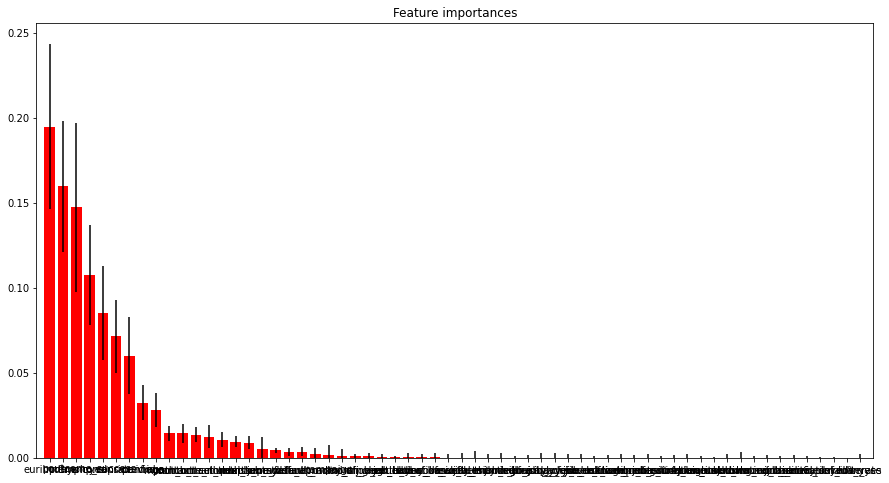

In [17]:

importances = CV_rfc.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_df.columns[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(X_df.columns)[indices])
plt.xlim([-1, X.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(15, 8)

In [18]:
y_predict = CV_rfc.best_estimator_.predict(X_test)


In [19]:
def plot_confusion_matrix(conf_mat, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    conf_mat: confusion matrix
    classes: names of classes to be annotated
    normalize: [True/False] whether to normalise by column
    """
    if normalize:
        conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(conf_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
        t = "(%.2f)" % (conf_mat[i, j])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


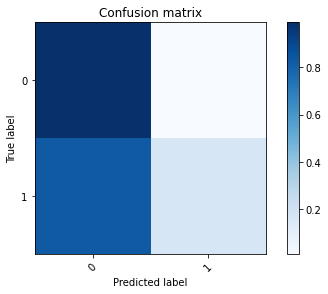

In [20]:

cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
y_test = y_test[:,0]
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y_test))), normalize=True,
                      title='Confusion matrix')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)
y_train = y_train.ravel()#reshape((-1,))

clf = RandomForestClassifier(n_estimators=250, max_depth=6, random_state=50)
clf.fit(X_train, y_train)

dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train, y_train)

dummy_scores = cross_val_score(dummy_clf, X_train, y_train, cv=10, scoring = make_scorer(f1_score))

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring = make_scorer(f1_score))


print("MSE: %0.8f +/- %0.8f" % (scores.mean(), scores.std()))
print("Dummy MSE: %0.8f +/- %0.8f" % (dummy_scores.mean(), dummy_scores.std()))

# param_grid = {
#     'n_estimators': [100,250,300],
#     'max_features':['auto', 'sqrt', 'log2']
# }
# CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 10)

# CV_rfc.fit(X_train, y_train)
# print(CV_rfc.best_params_)


MSE: 0.29016593 +/- 0.01820527
Dummy MSE: 0.10201228 +/- 0.01611300


In [22]:

clf = RandomForestClassifier(n_estimators=250,max_features='auto', random_state=50)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring = make_scorer(f1_score))
print(scores.mean())

clf.fit(X_train, y_train)


0.37948858101527283


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)
y_train = y_train.ravel()#reshape((-1,))

clf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=50)
clf.fit(X_train, y_train)

dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train, y_train)

dummy_scores = cross_val_score(dummy_clf, X_train, y_train, cv=10, scoring = make_scorer(f1_score))

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring = make_scorer(f1_score))


print("MSE: %0.8f +/- %0.8f" % (scores.mean(), scores.std()))
print("Dummy MSE: %0.8f +/- %0.8f" % (dummy_scores.mean(), dummy_scores.std()))

# param_grid = {
#     'n_estimators': [100,200,300],
#     'max_features':['auto', 'sqrt', 'log2']
# }
# CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 10)

# CV_rfc.fit(X_train, y_train)
# print(CV_rfc.best_params_)

MSE: 0.30374742 +/- 0.01824864
Dummy MSE: 0.10572300 +/- 0.01341715


In [24]:
clf = RandomForestClassifier(n_estimators=200,max_features='auto', random_state=50)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring = make_scorer(f1_score))
print(scores.mean())

clf.fit(X_train, y_train)

0.3796825590028243


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)
y_train = y_train.ravel()#reshape((-1,))

clf = RandomForestClassifier(n_estimators=150, max_depth=6, random_state=50)
clf.fit(X_train, y_train)

dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train, y_train)

dummy_scores = cross_val_score(dummy_clf, X_train, y_train, cv=10, scoring = make_scorer(f1_score))

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring = make_scorer(f1_score))


print("MSE: %0.8f +/- %0.8f" % (scores.mean(), scores.std()))
print("Dummy MSE: %0.8f +/- %0.8f" % (dummy_scores.mean(), dummy_scores.std()))

# param_grid = {
#     'n_estimators': [100,150,300],
#     'max_features':['auto', 'sqrt', 'log2']
# }
# CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 10)

# CV_rfc.fit(X_train, y_train)
# print(CV_rfc.best_params_)

MSE: 0.29028312 +/- 0.01871217
Dummy MSE: 0.11159944 +/- 0.01293484


MSE: 0.28825128 +/- 0.01811964
Dummy MSE: 0.11358246 +/- 0.01491225
{'max_features': 'auto', 'n_estimators': 1000}
0.3797400228639732
Feature ranking:
1. nr.employed (0.191388)
2. euribor3m (0.160413)
3. pdays (0.118457)
4. poutcome_success (0.098544)
5. emp.var.rate (0.079317)
6. cons.conf.idx (0.075000)
7. cons.price.idx (0.060702)
8. previous (0.024857)
9. age (0.022766)
10. poutcome_nonexistent (0.019791)
11. month_mar (0.016740)
12. poutcome_failure (0.015688)
13. month_oct (0.013353)
14. contact_cellular (0.012838)
15. month_may (0.011110)
16. contact_telephone (0.010233)
17. month_apr (0.006946)
18. campaign (0.005084)
19. month_sep (0.005044)
20. month_jun (0.003757)
21. day_of_week_mon (0.003462)
22. default_unknown (0.003257)
23. job_student (0.003108)
24. default_no (0.002954)
25. job_retired (0.002529)
26. job_blue-collar (0.002389)
27. marital_single (0.001697)
28. education_university.degree (0.001546)
29. month_aug (0.001500)
30. day_of_week_tue (0.001446)
31. day_of_wee

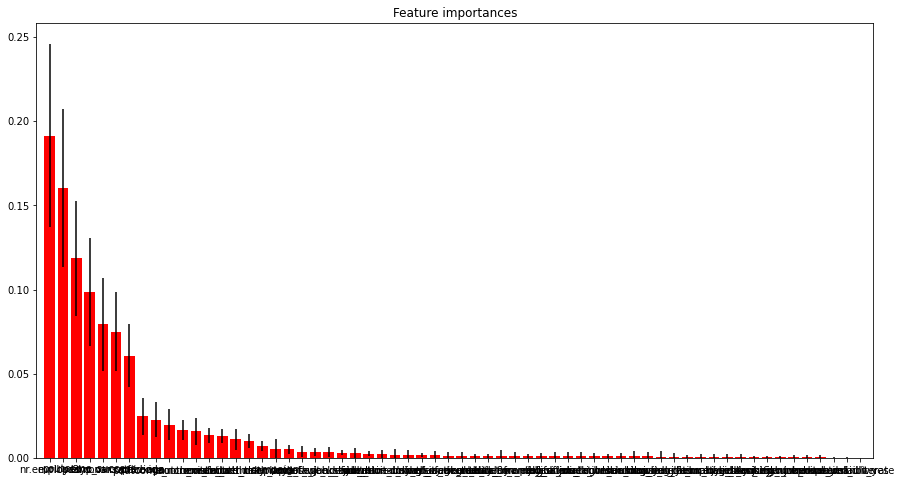

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)
y_train = y_train.ravel()#reshape((-1,))

clf = RandomForestClassifier(n_estimators=1000, max_depth=6, random_state=60)
clf.fit(X_train, y_train)

dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train, y_train)

dummy_scores = cross_val_score(dummy_clf, X_train, y_train, cv=10, scoring = make_scorer(f1_score))

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring = make_scorer(f1_score))


print("MSE: %0.8f +/- %0.8f" % (scores.mean(), scores.std()))
print("Dummy MSE: %0.8f +/- %0.8f" % (dummy_scores.mean(), dummy_scores.std()))

param_grid = {
    'n_estimators': [100, 300,1000],
    'max_features':['auto', 'sqrt', 'log2']
}
CV_rfc2 = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 10)

CV_rfc2.fit(X_train, y_train)
print(CV_rfc2.best_params_)
clf = RandomForestClassifier(n_estimators=1000,max_features='auto', random_state=60)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring = make_scorer(f1_score))
print(scores.mean())

clf.fit(X_train, y_train)

importances = CV_rfc2.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_df.columns[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(X_df.columns)[indices])
plt.xlim([-1, X.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(15, 8)


[0 0 0 ... 0 0 0]
[1 0 0 ... 0 0 1]
Normalized confusion matrix


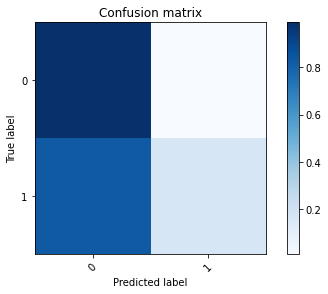

In [27]:

y_predict = CV_rfc.best_estimator_.predict(X_test)
print(y_predict)
print(y_train)
def plot_confusion_matrix(conf_mat, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    conf_mat: confusion matrix
    classes: names of classes to be annotated
    normalize: [True/False] whether to normalise by column
    """
    if normalize:
        conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(conf_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
        t = "(%.2f)" % (conf_mat[i, j])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
y_test = y_test[:,0]
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y_test))), normalize=True,
                      title='Confusion matrix')

MSE: 0.28792315 +/- 0.01818844
Dummy MSE: 0.10895826 +/- 0.01152891
{'max_features': 'auto', 'n_estimators': 750}
0.37932546697410496
Feature ranking:
1. nr.employed (0.193401)
2. euribor3m (0.158868)
3. pdays (0.113349)
4. poutcome_success (0.098633)
5. emp.var.rate (0.082884)
6. cons.conf.idx (0.073327)
7. cons.price.idx (0.060669)
8. previous (0.025557)
9. age (0.023143)
10. poutcome_nonexistent (0.020216)
11. month_mar (0.017005)
12. poutcome_failure (0.016326)
13. month_oct (0.013526)
14. contact_cellular (0.012063)
15. month_may (0.011861)
16. contact_telephone (0.009952)
17. month_apr (0.007178)
18. month_sep (0.005470)
19. campaign (0.005110)
20. day_of_week_mon (0.003559)
21. month_jun (0.003530)
22. default_unknown (0.003201)
23. default_no (0.003022)
24. job_student (0.002945)
25. job_retired (0.002548)
26. job_blue-collar (0.002470)
27. marital_single (0.001700)
28. education_university.degree (0.001555)
29. month_aug (0.001520)
30. day_of_week_tue (0.001498)
31. day_of_wee

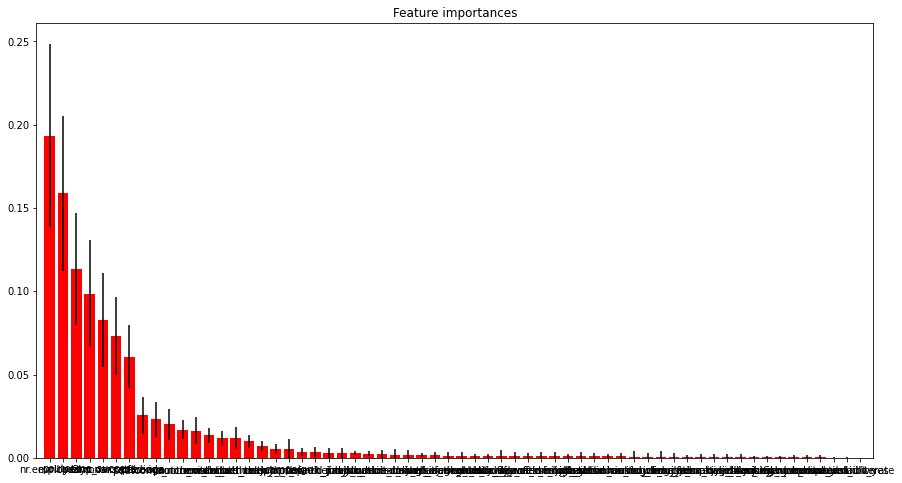

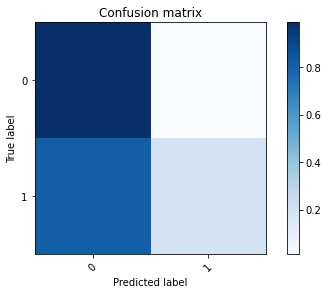

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)
y_train = y_train.ravel()#reshape((-1,))

clf = RandomForestClassifier(n_estimators=750, max_depth=6, random_state=60)
clf.fit(X_train, y_train)

dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train, y_train)

dummy_scores = cross_val_score(dummy_clf, X_train, y_train, cv=10, scoring = make_scorer(f1_score))

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring = make_scorer(f1_score))


print("MSE: %0.8f +/- %0.8f" % (scores.mean(), scores.std()))
print("Dummy MSE: %0.8f +/- %0.8f" % (dummy_scores.mean(), dummy_scores.std()))

param_grid = {
    'n_estimators': [100, 300, 750],
    'max_features':['auto', 'sqrt', 'log2']
}
CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 10)

CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)
clf = RandomForestClassifier(n_estimators=750,max_features='auto', random_state=60)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring = make_scorer(f1_score))
print(scores.mean())

clf.fit(X_train, y_train)

importances = CV_rfc.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_df.columns[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(X_df.columns)[indices])
plt.xlim([-1, X.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(15, 8)

y_predict = CV_rfc.best_estimator_.predict(X_test)

def plot_confusion_matrix(conf_mat, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    conf_mat: confusion matrix
    classes: names of classes to be annotated
    normalize: [True/False] whether to normalise by column
    """
    if normalize:
        conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(conf_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
        t = "(%.2f)" % (conf_mat[i, j])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
y_test = y_test[:,0]
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y_test))), normalize=True,
                      title='Confusion matrix')